In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler

### Import dataset

In [2]:
data=pd.read_csv('penguins_size.csv')

### Explore dataset

In [3]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
data.nunique()

species                3
island                 3
culmen_length_mm     164
culmen_depth_mm       80
flipper_length_mm     55
body_mass_g           94
sex                    3
dtype: int64

In [8]:
def count_all_cat (df):
    for column in df:
        if df[column].dtype != np.number:
            print (column.upper(), ":")
            print (' ')
            print (' ')
            print ("Unique values for", column, ":")
            print (' ')
            print (set(list(df[column])))
            print (' ')
            print (' ')
            print ("Value counts for", column, ":")
            print (' ')
            print (df[column].value_counts())
            print (' ')
            print (' ')
            print (' ')
    

In [9]:
count_all_cat(data)

SPECIES :
 
 
Unique values for species :
 
{'Gentoo', 'Adelie', 'Chinstrap'}
 
 
Value counts for species :
 
Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64
 
 
 
ISLAND :
 
 
Unique values for island :
 
{'Torgersen', 'Dream', 'Biscoe'}
 
 
Value counts for island :
 
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64
 
 
 
SEX :
 
 
Unique values for sex :
 
{'MALE', 'FEMALE', nan, '.'}
 
 
Value counts for sex :
 
MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64
 
 
 


C:\Users\x\AppData\Local\Temp/ipykernel_11196/3849421784.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype != np.number:


In [10]:
old_data = data
# to store original data - just in case

### Dealing with missing data

In [11]:
data.shape

(344, 7)

In [12]:
data=data.drop_duplicates()

In [13]:
data.shape

(344, 7)

In [14]:
for column in data:
        if data[column].dtype == np.number:
            data[column].fillna(data[column].mean(), inplace=True)
            
# to replace nulls with the mean

C:\Users\x\AppData\Local\Temp/ipykernel_11196/2116739561.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.5+ KB


In [16]:
data['sex']=data['sex'].replace(['.', None], 'Unknown')

# to replace nulls and the single '.' with unknows

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.5+ KB


In [18]:
count_all_cat(data)

SPECIES :
 
 
Unique values for species :
 
{'Gentoo', 'Adelie', 'Chinstrap'}
 
 
Value counts for species :
 
Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64
 
 
 
ISLAND :
 
 
Unique values for island :
 
{'Torgersen', 'Dream', 'Biscoe'}
 
 
Value counts for island :
 
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64
 
 
 
SEX :
 
 
Unique values for sex :
 
{'MALE', 'FEMALE', 'Unknown'}
 
 
Value counts for sex :
 
MALE       168
FEMALE     165
Unknown     11
Name: sex, dtype: int64
 
 
 


C:\Users\x\AppData\Local\Temp/ipykernel_11196/3849421784.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype != np.number:


### Convert mm to cm

In [19]:
for column in data:
    if str(data[column].name)[-2:] == 'mm':
        data[str(data[column].name)[:-2] + 'cm'] = data[column]/10

In [20]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,culmen_length_cm,culmen_depth_cm,flipper_length_cm
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE,3.910000,1.870000,18.10000
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE,3.950000,1.740000,18.60000
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE,4.030000,1.800000,19.50000
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Unknown,4.392193,1.715117,20.09152
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE,3.670000,1.930000,19.30000


In [21]:
nomm_columns_lst = []
for column in data:
    if str(data[column].name)[-2:] != 'mm':
        nomm_columns_lst.append(data[column].name)
data = data[nomm_columns_lst]

data.head()

,species,island,body_mass_g,sex,culmen_length_cm,culmen_depth_cm,flipper_length_cm
0,Adelie,Torgersen,3750.000000,MALE,3.910000,1.870000,18.10000
1,Adelie,Torgersen,3800.000000,FEMALE,3.950000,1.740000,18.60000
2,Adelie,Torgersen,3250.000000,FEMALE,4.030000,1.800000,19.50000
3,Adelie,Torgersen,4201.754386,Unknown,4.392193,1.715117,20.09152
4,Adelie,Torgersen,3450.000000,FEMALE,3.670000,1.930000,19.30000


### Explore the data to search for outliers

In [22]:
def find_outliers(col):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    IQR = q3 - q1
    ll = q1 - (1.5*IQR)
    ul = q3 + (1.5*IQR)
    upper_outliers = col[col > ul].index.tolist()
    lower_outliers = col[col < ll].index.tolist()
    bad_indices = list(set(upper_outliers + lower_outliers))
    return(bad_indices)

bad_indexes = []
for col in data.columns:
    if data[col].dtype in ["int64","float64"]:
        bad_indexes.append(find_outliers(data[col]))

bad_indexes = set(list(np.concatenate(bad_indexes).flat))
print(len(bad_indexes))

0


we have no outliers

### Correlation matrix with a heatmap

In [23]:
corre_matrix = data.corr()

corre_matrix

,body_mass_g,culmen_length_cm,culmen_depth_cm,flipper_length_cm
body_mass_g,1.000000,0.595110,-0.471916,0.871202
culmen_length_cm,0.595110,1.000000,-0.235053,0.656181
culmen_depth_cm,-0.471916,-0.235053,1.000000,-0.583851
flipper_length_cm,0.871202,0.656181,-0.583851,1.000000


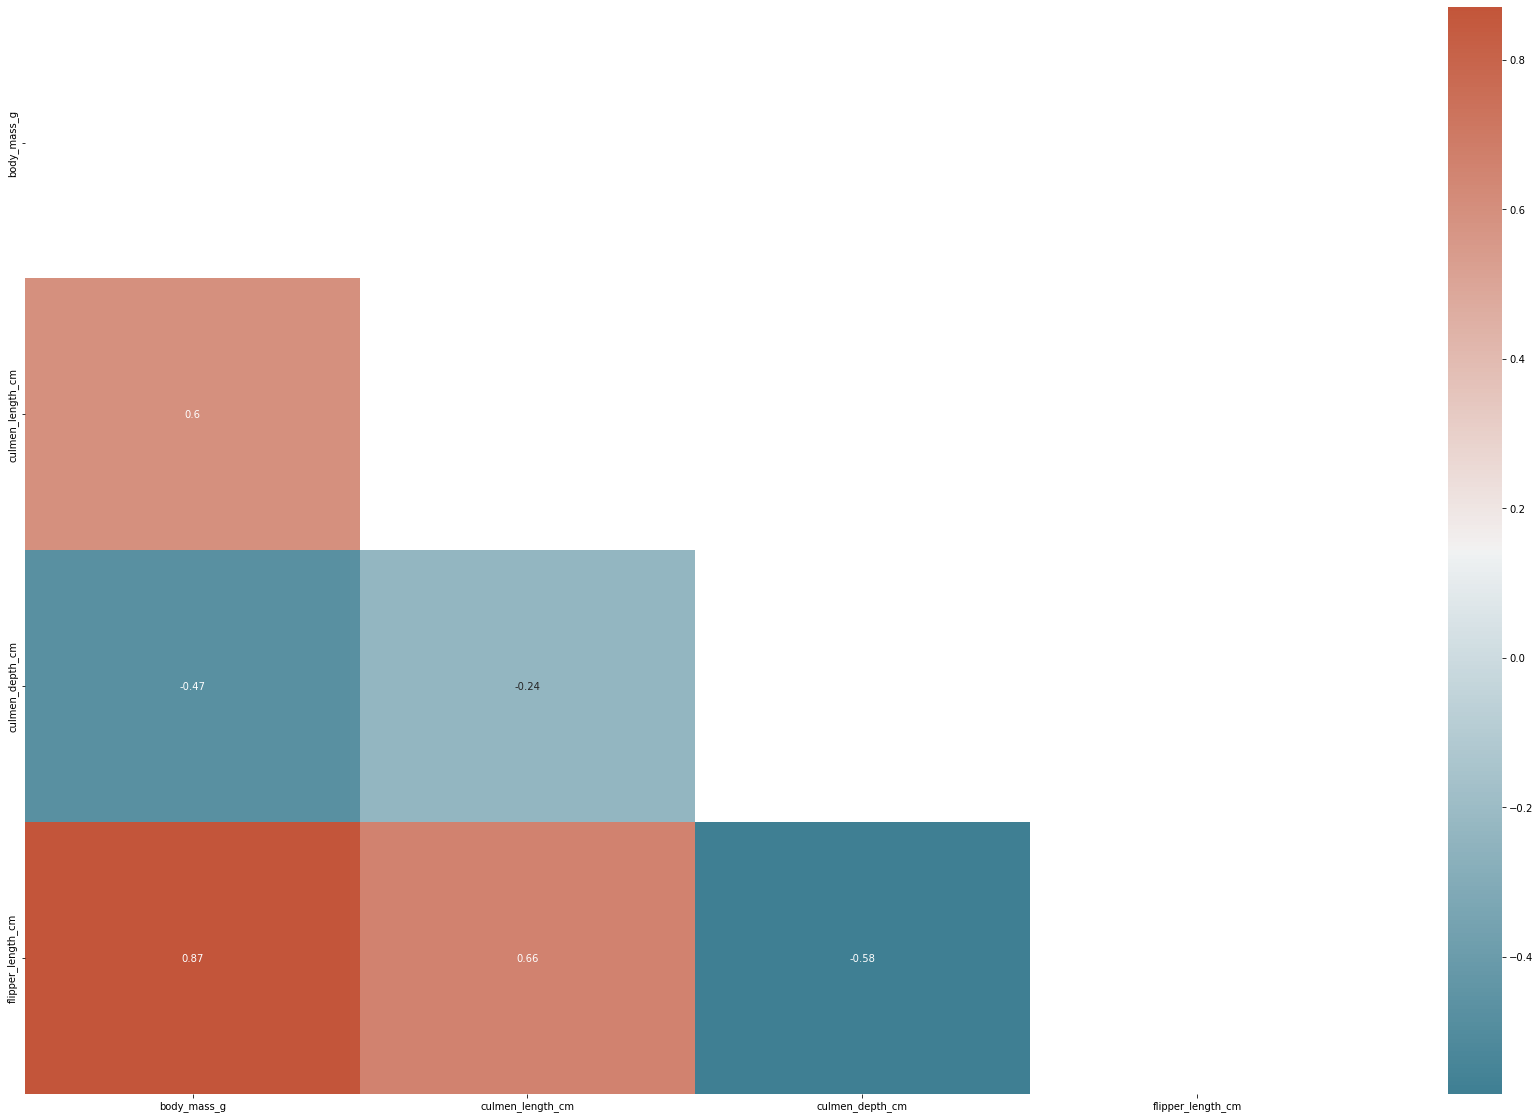

In [24]:
mask=np.zeros_like(corre_matrix)
mask[np.triu_indices_from(mask)]=True
fig,ax = plt.subplots(figsize= (30,20));
ax= sns.heatmap(corre_matrix, mask=mask, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap = True))

### Modeling and predicting the relationship between numerical features and the label (species)

In [25]:
X_cat=data[['island', 'sex']]

#this will be useful later ;)

In [26]:
data.drop(data.columns[[1, 3]], axis = 1, inplace = True)

In [27]:
data.head()

,species,body_mass_g,culmen_length_cm,culmen_depth_cm,flipper_length_cm
0,Adelie,3750.000000,3.910000,1.870000,18.10000
1,Adelie,3800.000000,3.950000,1.740000,18.60000
2,Adelie,3250.000000,4.030000,1.800000,19.50000
3,Adelie,4201.754386,4.392193,1.715117,20.09152
4,Adelie,3450.000000,3.670000,1.930000,19.30000


In [28]:
y=data['species']
X=data._get_numeric_data()

In [29]:
X.head()

,body_mass_g,culmen_length_cm,culmen_depth_cm,flipper_length_cm
0,3750.000000,3.910000,1.870000,18.10000
1,3800.000000,3.950000,1.740000,18.60000
2,3250.000000,4.030000,1.800000,19.50000
3,4201.754386,4.392193,1.715117,20.09152
4,3450.000000,3.670000,1.930000,19.30000


In [30]:
y.head()

0    Adelie
1    Adelie
2    Adelie
3    Adelie
4    Adelie
Name: species, dtype: object

In [31]:
scaler = MinMaxScaler() 
scaled_X=scaler.fit_transform(X)
scaled_data_X=pd.DataFrame(scaled_X)

In [32]:
X_train,X_test,y_train,y_test=train_test_split(scaled_data_X,y,test_size=0.3, random_state=40)

In [33]:
classifier = LogisticRegression(solver='lbfgs', max_iter=1000,random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [34]:
preds=classifier.predict(X_test)

preds

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Ad

In [35]:
for x in range(len(preds)):
   if (preds[x] == 1):
      print(x, end="\t")

In [36]:
print('Accuracy: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy: 0.96


In [37]:
confusion_matrix(y_test, preds)

array([[46,  0,  0],
       [ 4, 19,  0],
       [ 0,  0, 35]], dtype=int64)

C:\Users\x\anaconda3\envs\class\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


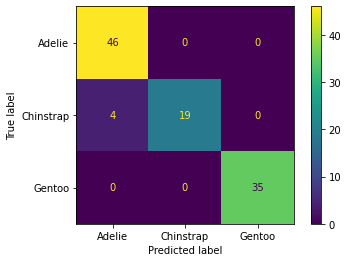

In [38]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

### BONUS! Encore, but with all the variables, AND pairwise scatterplots

In [39]:
X_cat.head()

# data retrieved from before dropping!

,island,sex
0,Torgersen,MALE
1,Torgersen,FEMALE
2,Torgersen,FEMALE
3,Torgersen,Unknown
4,Torgersen,FEMALE


In [40]:
X_dummies=pd.get_dummies(X_cat, drop_first=True)

In [41]:
dummified_X=pd.DataFrame(X_dummies)

In [42]:
X_final=pd.concat((scaled_data_X,dummified_X), axis=1)
X_final.shape

(344, 8)

In [43]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   0                 344 non-null    float64
 1   1                 344 non-null    float64
 2   2                 344 non-null    float64
 3   3                 344 non-null    float64
 4   island_Dream      344 non-null    uint8  
 5   island_Torgersen  344 non-null    uint8  
 6   sex_MALE          344 non-null    uint8  
 7   sex_Unknown       344 non-null    uint8  
dtypes: float64(4), uint8(4)
memory usage: 12.2 KB


In [45]:
Xfull_train,Xfull_test,yfull_train,yfull_test=train_test_split(X_final,y,test_size=0.3, random_state=40)

In [46]:
classifierfull = LogisticRegression(solver='lbfgs', max_iter=1000,random_state=0)
classifierfull.fit(Xfull_train, yfull_train)

C:\Users\x\anaconda3\envs\class\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(max_iter=1000, random_state=0)

In [48]:
preds_full=classifierfull.predict(Xfull_test)

preds_full

C:\Users\x\anaconda3\envs\class\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array(['Adelie', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie'

In [49]:
for x in range(len(preds_full)):
   if (preds_full[x] == 1):
      print(x, end="\t")

In [50]:
print('Accuracy: {:.2f}'.format(classifierfull.score(Xfull_test, yfull_test)))

Accuracy: 0.69


C:\Users\x\anaconda3\envs\class\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [51]:
confusion_matrix(yfull_test, preds_full)

array([[14, 16, 16],
       [ 0, 23,  0],
       [ 0,  0, 35]], dtype=int64)

C:\Users\x\anaconda3\envs\class\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\x\anaconda3\envs\class\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


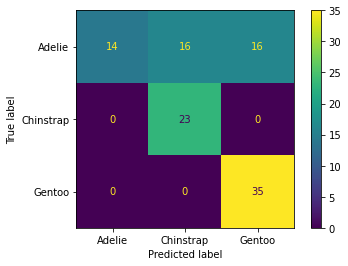

In [53]:
plot_confusion_matrix(classifierfull, Xfull_test, yfull_test)  
plt.show()

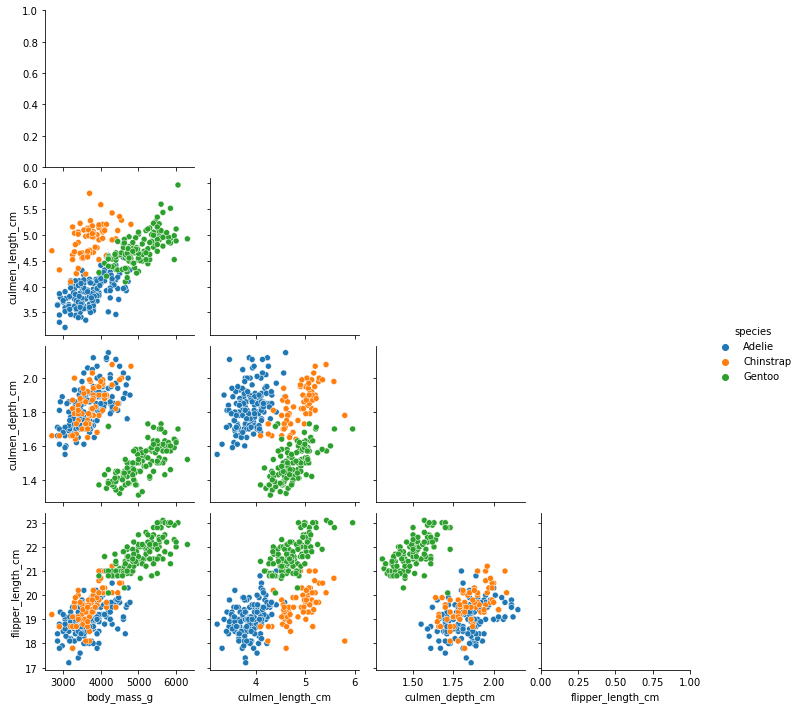

In [47]:
sns.pairplot(data, hue='species', corner=True, diag_kind='None')